In [1]:
# Step 1: Import Libraries
import pandas as pd    # For data manipulation
import numpy as np     # For numerical computations
import matplotlib.pyplot as plt  # For visualization
from sklearn.model_selection import train_test_split  # To split data
from sklearn.ensemble import RandomForestRegressor  # A machine learning model
from sklearn.metrics import mean_squared_error, mean_absolute_error  # To evaluate the model


# Fetch data 
stock_data = pd.read_csv('df.csv')


print(stock_data.index)

RangeIndex(start=0, stop=18292, step=1)


In [2]:
# Display the first few rows of the dataset
print(stock_data.head())

         Date   Open   High    Low  Close   Volume  Dividends  Stock Splits
0  1950-01-03  16.66  16.66  16.66  16.66  1260000          0             0
1  1950-01-04  16.85  16.85  16.85  16.85  1890000          0             0
2  1950-01-05  16.93  16.93  16.93  16.93  2550000          0             0
3  1950-01-06  16.98  16.98  16.98  16.98  2010000          0             0
4  1950-01-09  17.08  17.08  17.08  17.08  2520000          0             0


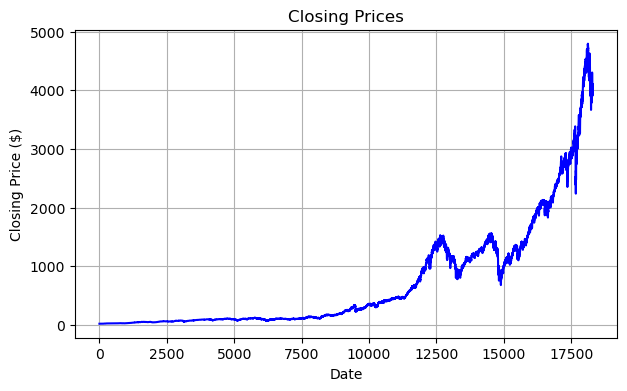

In [3]:
# Step 3: Visualize Closing Prices
# Plot the closing prices to understand the trend
plt.figure(figsize=(7, 4))
stock_data['Close'].plot(title=f"Closing Prices", color='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.grid(True)
plt.show()

In [4]:
# Step 4: Feature Engineering
# Features are columns used to predict the target variable (Close price)
# Target variable is the value we are predicting

# Define features and target
# 'Open', 'High', 'Low', and 'Volume' are used as input features
# 'Close' is the target value (what we want to predict)
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Prepare the dataset
X = stock_data[features]  # Input features
y = stock_data[target]    # Target variable

# Handle missing values (if any)
# Fill missing values with the mean of the respective column
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Step 5: Split the Data into Training and Test Sets
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Model
# Use a Random Forest Regressor (a popular machine learning model)
model = RandomForestRegressor(random_state=42, n_estimators=100)  # 100 trees in the forest
model.fit(X_train, y_train)  # Train the model on the training data

# Step 7: Evaluate the Model
# Predict the 'Close' prices for the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 37.87
Mean Absolute Error (MAE): 2.63


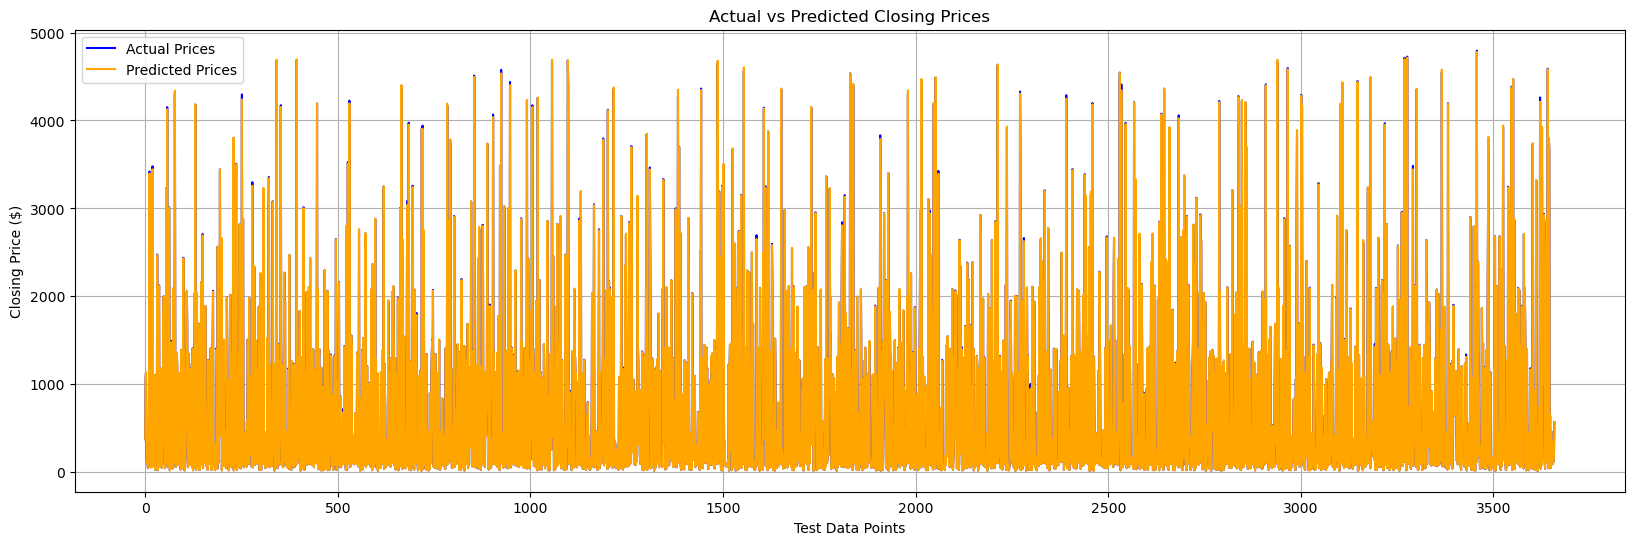

In [16]:
# Step 8: Visualize Actual vs Predicted
# Compare actual and predicted 'Close' prices
plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='orange')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Closing Price ($)")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Step 9: Predict Future Stock Prices
# Example of predicting stock prices for new data
new_data = pd.DataFrame({
    'Open': [150, 145, 160],
    'High': [155, 150, 165],
    'Low': [148, 143, 158],
    'Volume': [1000000, 1500000, 1200000]  # Example volumes
})

# Predict 'Close' prices for this new data
predicted_prices = model.predict(new_data)

# Print the predicted prices
print("\nPredicted Closing Prices for New Data:")
print(predicted_prices)


Predicted Closing Prices for New Data:
[152.86169922 147.0359024  162.88499924]
